In [1]:
#Data Wrangling-II

In [2]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = {'id': [1,2,3,4,5,6,7,8,9,10],
        'name':  ['Akansha',np.nan,'sakshi','punam','gauri','mayuri','palak',np.nan,'shital','samiksha'],
        'marks': [10,67,78,78,78,67,np.nan,7,88,85],
        'address':['pune',np.nan,'mumbai','delhi','amravati',np.nan,'nagpur','khamgaon','nandura','akola']
        }

In [4]:
df = pd.DataFrame(data)
print(df)

   id      name  marks   address
0   1   Akansha   10.0      pune
1   2       NaN   67.0       NaN
2   3    sakshi   78.0    mumbai
3   4     punam   78.0     delhi
4   5     gauri   78.0  amravati
5   6    mayuri   67.0       NaN
6   7     palak    NaN    nagpur
7   8       NaN    7.0  khamgaon
8   9    shital   88.0   nandura
9  10  samiksha   85.0     akola


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10 non-null     int64  
 1   name     8 non-null      object 
 2   marks    9 non-null      float64
 3   address  8 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


In [6]:
df.isna()

,id,name,marks,address
0,False,False,False,False
1,False,True,False,True
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,True
6,False,False,True,False
7,False,True,False,False
8,False,False,False,False
9,False,False,False,False


In [7]:
df.isnull()

,id,name,marks,address
0,False,False,False,False
1,False,True,False,True
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,True
6,False,False,True,False
7,False,True,False,False
8,False,False,False,False
9,False,False,False,False


In [8]:
df.notnull()

,id,name,marks,address
0,True,True,True,True
1,True,False,True,False
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,False
6,True,True,False,True
7,True,False,True,True
8,True,True,True,True
9,True,True,True,True


In [9]:
mean=df['marks'].mean()

In [10]:
df['marks']=df['marks'].fillna(mean)

In [11]:
df

,id,name,marks,address
0,1,Akansha,10.0,pune
1,2,NaN,67.0,NaN
2,3,sakshi,78.0,mumbai
3,4,punam,78.0,delhi
4,5,gauri,78.0,amravati
5,6,mayuri,67.0,NaN
6,7,palak,62.0,nagpur
7,8,NaN,7.0,khamgaon
8,9,shital,88.0,nandura
9,10,samiksha,85.0,akola


In [12]:
#df.dropna()

In [13]:
df.fillna(0)

,id,name,marks,address
0,1,Akansha,10.0,pune
1,2,0,67.0,0
2,3,sakshi,78.0,mumbai
3,4,punam,78.0,delhi
4,5,gauri,78.0,amravati
5,6,mayuri,67.0,0
6,7,palak,62.0,nagpur
7,8,0,7.0,khamgaon
8,9,shital,88.0,nandura
9,10,samiksha,85.0,akola


In [14]:
df['name']=df['name'].fillna(method='pad')

In [15]:
df

,id,name,marks,address
0,1,Akansha,10.0,pune
1,2,Akansha,67.0,NaN
2,3,sakshi,78.0,mumbai
3,4,punam,78.0,delhi
4,5,gauri,78.0,amravati
5,6,mayuri,67.0,NaN
6,7,palak,62.0,nagpur
7,8,palak,7.0,khamgaon
8,9,shital,88.0,nandura
9,10,samiksha,85.0,akola


In [16]:
df.fillna(method='bfill')

,id,name,marks,address
0,1,Akansha,10.0,pune
1,2,Akansha,67.0,mumbai
2,3,sakshi,78.0,mumbai
3,4,punam,78.0,delhi
4,5,gauri,78.0,amravati
5,6,mayuri,67.0,nagpur
6,7,palak,62.0,nagpur
7,8,palak,7.0,khamgaon
8,9,shital,88.0,nandura
9,10,samiksha,85.0,akola


<Axes: >

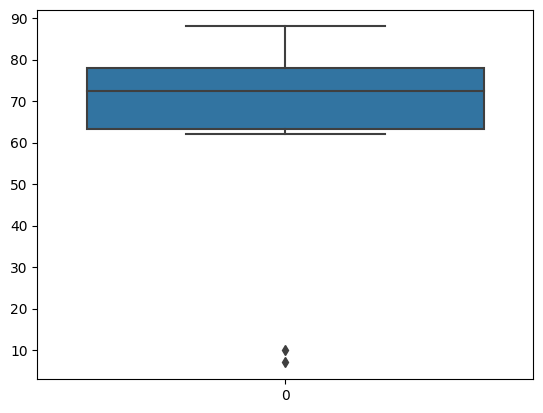

In [17]:
# Check for outliers in numeric variables
sns.boxplot(df['marks'])

In [18]:

do=df[df['marks']<28]

In [19]:
print(do)

   id     name  marks   address
0   1  Akansha   10.0      pune
7   8    palak    7.0  khamgaon


In [20]:
df['outlier']=np.where(df['marks']<28,0,1)

In [21]:
print(df)

   id      name  marks   address  outlier
0   1   Akansha   10.0      pune        0
1   2   Akansha   67.0       NaN        1
2   3    sakshi   78.0    mumbai        1
3   4     punam   78.0     delhi        1
4   5     gauri   78.0  amravati        1
5   6    mayuri   67.0       NaN        1
6   7     palak   62.0    nagpur        1
7   8     palak    7.0  khamgaon        0
8   9    shital   88.0   nandura        1
9  10  samiksha   85.0     akola        1


In [22]:
# Handle outliers
# Scan all numeric variables for outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()


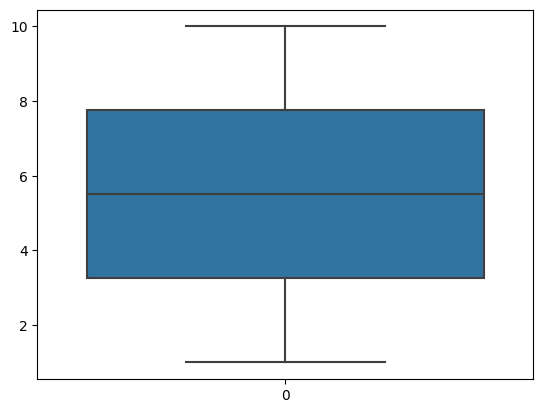

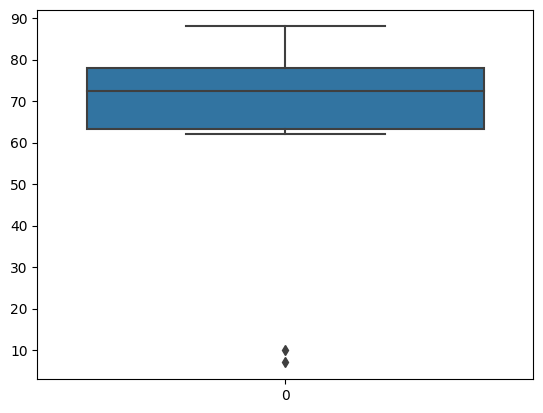

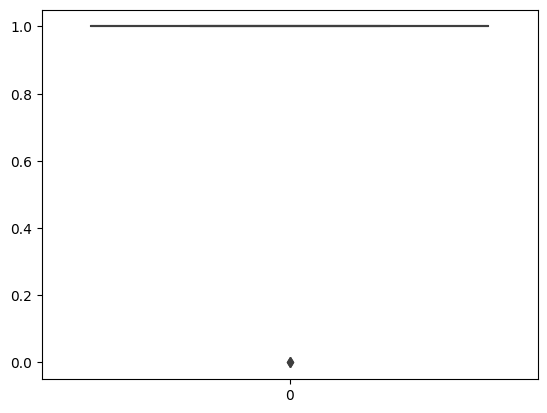

In [23]:
for col in numeric_cols:
    # Create boxplot to visualize outliers
    sns.boxplot(df[col])
   
    plt.show()
    
    # Calculate interquartile range (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Replace outliers with median value
    df[col] = np.where(df[col] < Q1 - 1.5*IQR, df[col].median(), df[col])
    df[col] = np.where(df[col] > Q3 + 1.5*IQR, df[col].median(), df[col])

In [24]:
df

,id,name,marks,address,outlier
0,1.0,Akansha,72.5,pune,1.0
1,2.0,Akansha,67.0,NaN,1.0
2,3.0,sakshi,78.0,mumbai,1.0
3,4.0,punam,78.0,delhi,1.0
4,5.0,gauri,78.0,amravati,1.0
5,6.0,mayuri,67.0,NaN,1.0
6,7.0,palak,62.0,nagpur,1.0
7,8.0,palak,72.5,khamgaon,1.0
8,9.0,shital,88.0,nandura,1.0
9,10.0,samiksha,85.0,akola,1.0


In [25]:
df_scale=df.copy()

In [26]:
col_names=['marks']

In [27]:
features=df_scale[col_names]

In [28]:
scaler=MinMaxScaler(feature_range=(5,10))

In [29]:
df_scale[col_names]=scaler.fit_transform(features.values)
df_scale

,id,name,marks,address,outlier
0,1.0,Akansha,7.019231,pune,1.0
1,2.0,Akansha,5.961538,NaN,1.0
2,3.0,sakshi,8.076923,mumbai,1.0
3,4.0,punam,8.076923,delhi,1.0
4,5.0,gauri,8.076923,amravati,1.0
5,6.0,mayuri,5.961538,NaN,1.0
6,7.0,palak,5.000000,nagpur,1.0
7,8.0,palak,7.019231,khamgaon,1.0
8,9.0,shital,10.000000,nandura,1.0
9,10.0,samiksha,9.423077,akola,1.0


In [30]:
# Assuming 'Test Score' is a numeric variable with positive values
df["marks"] = np.log(df["marks"])


In [31]:
df

,id,name,marks,address,outlier
0,1.0,Akansha,4.283587,pune,1.0
1,2.0,Akansha,4.204693,NaN,1.0
2,3.0,sakshi,4.356709,mumbai,1.0
3,4.0,punam,4.356709,delhi,1.0
4,5.0,gauri,4.356709,amravati,1.0
5,6.0,mayuri,4.204693,NaN,1.0
6,7.0,palak,4.127134,nagpur,1.0
7,8.0,palak,4.283587,khamgaon,1.0
8,9.0,shital,4.477337,nandura,1.0
9,10.0,samiksha,4.442651,akola,1.0
